1
143


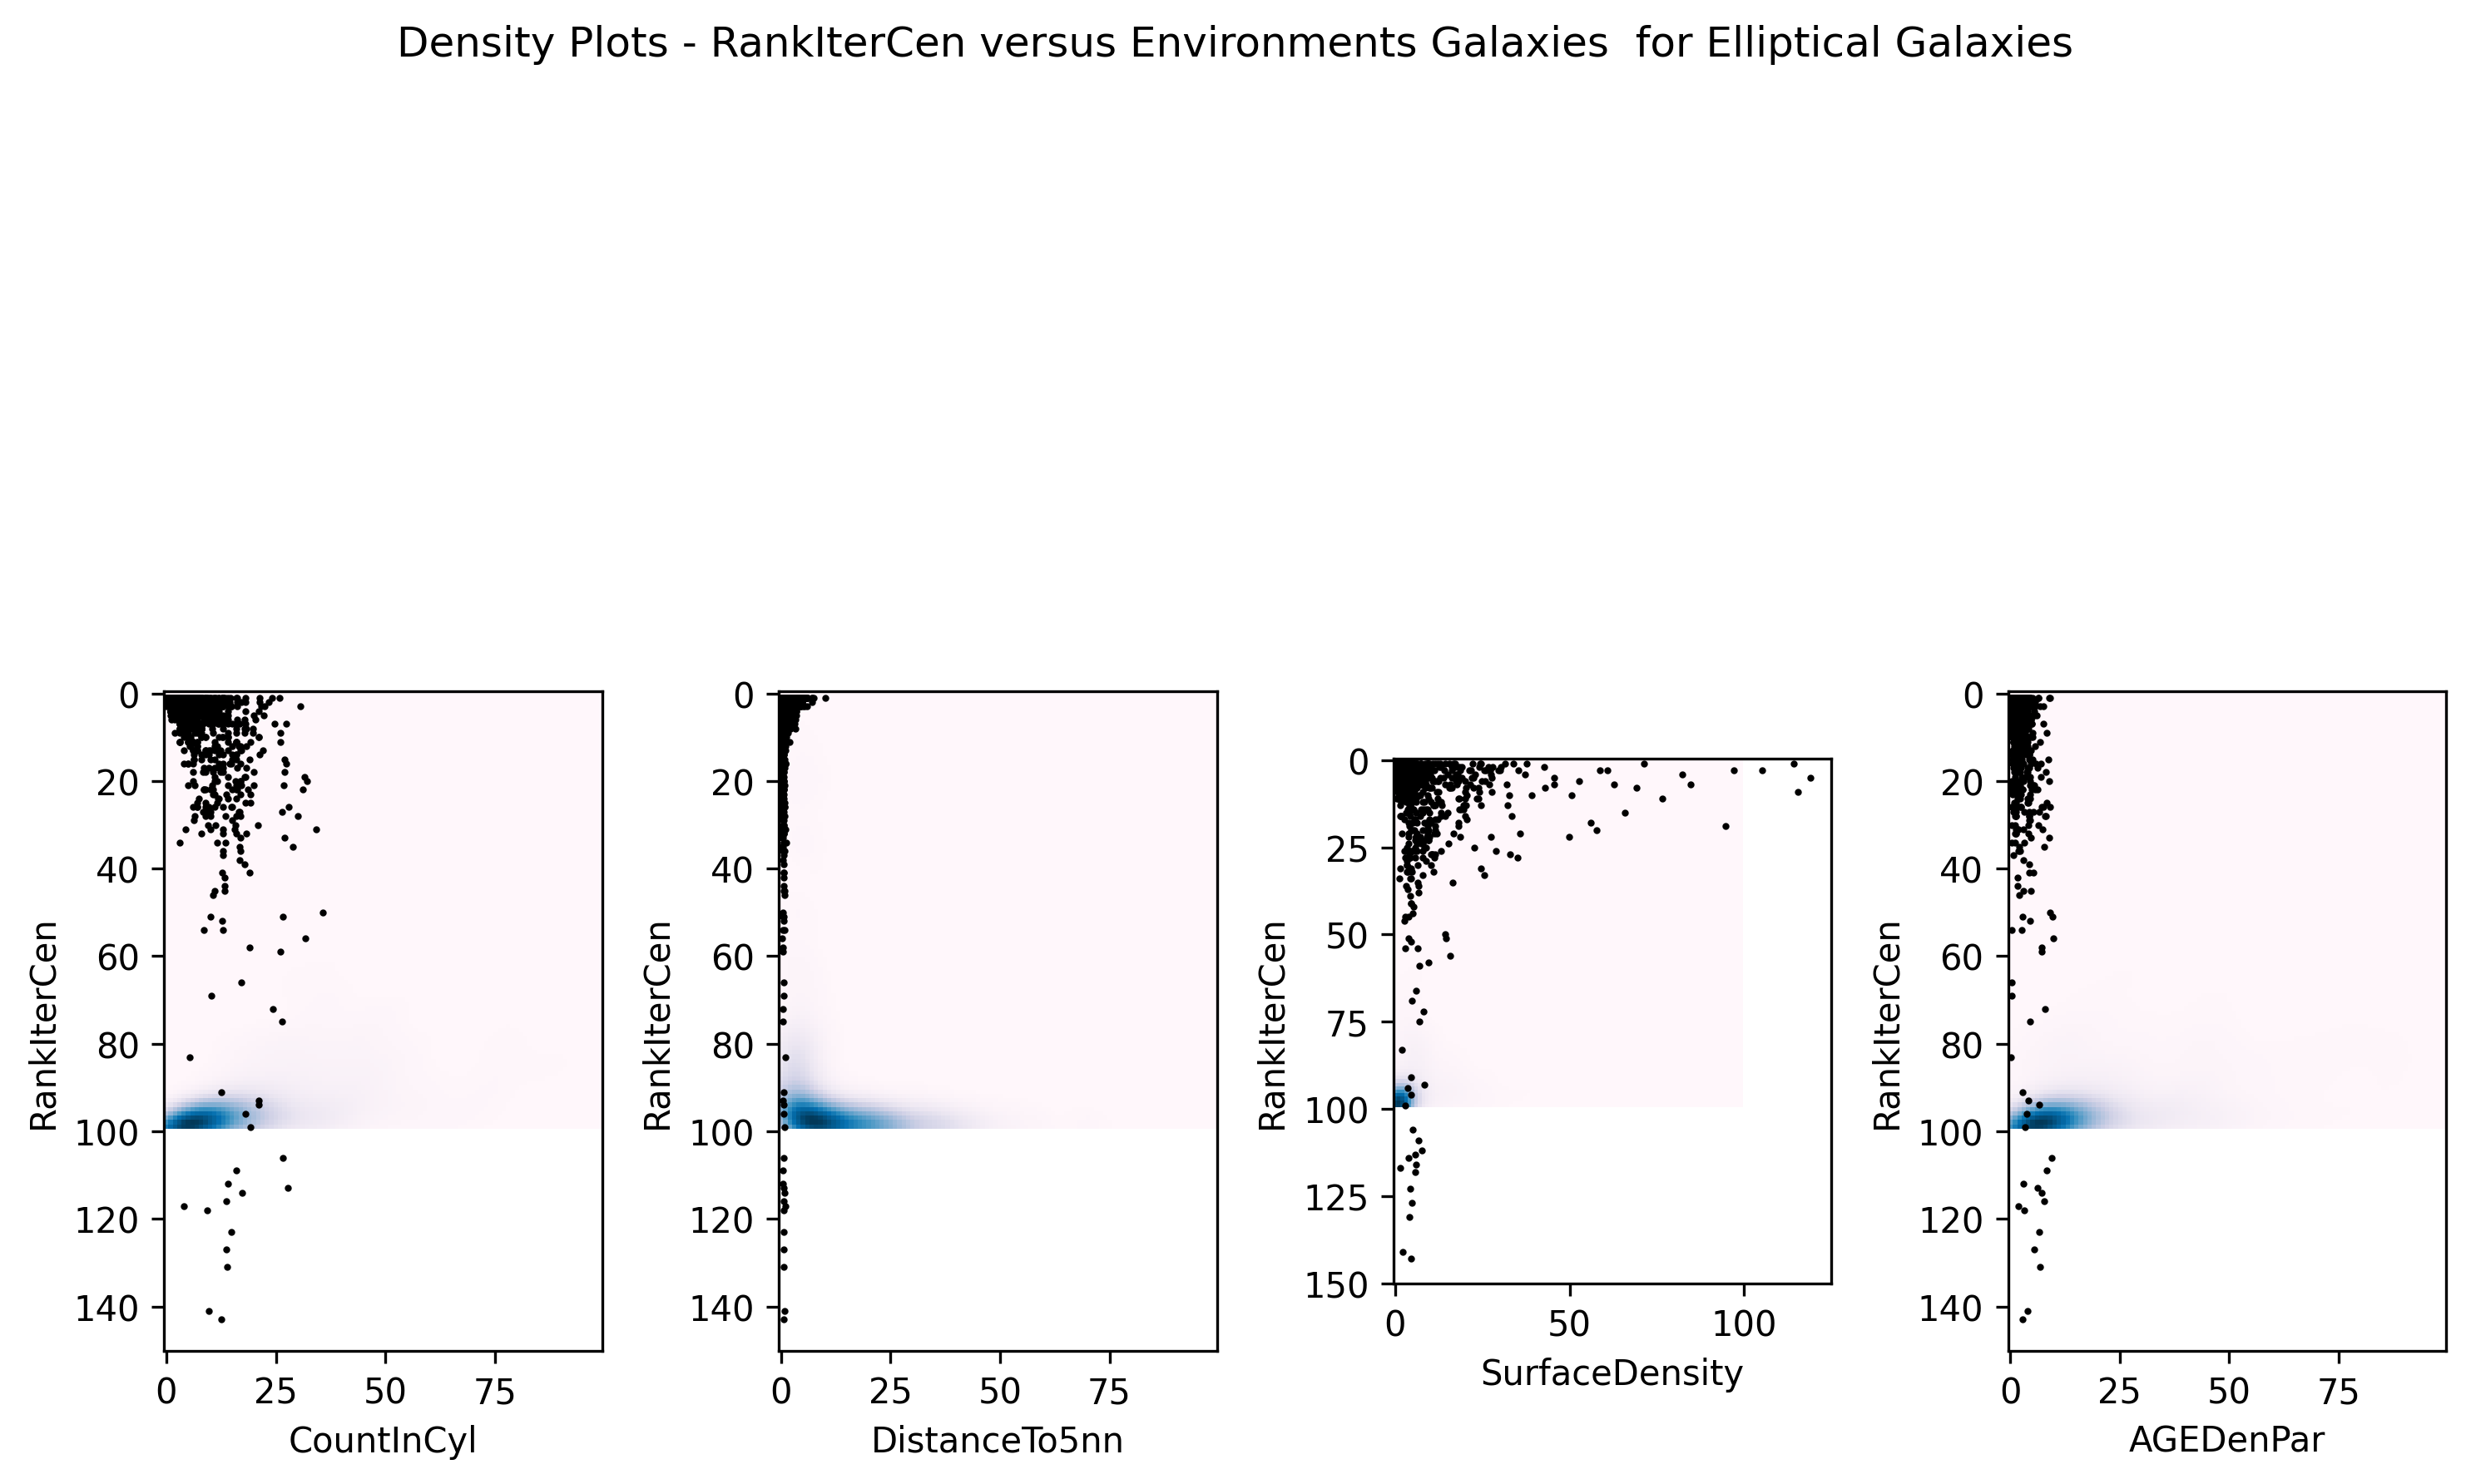

0.0
1.0987333


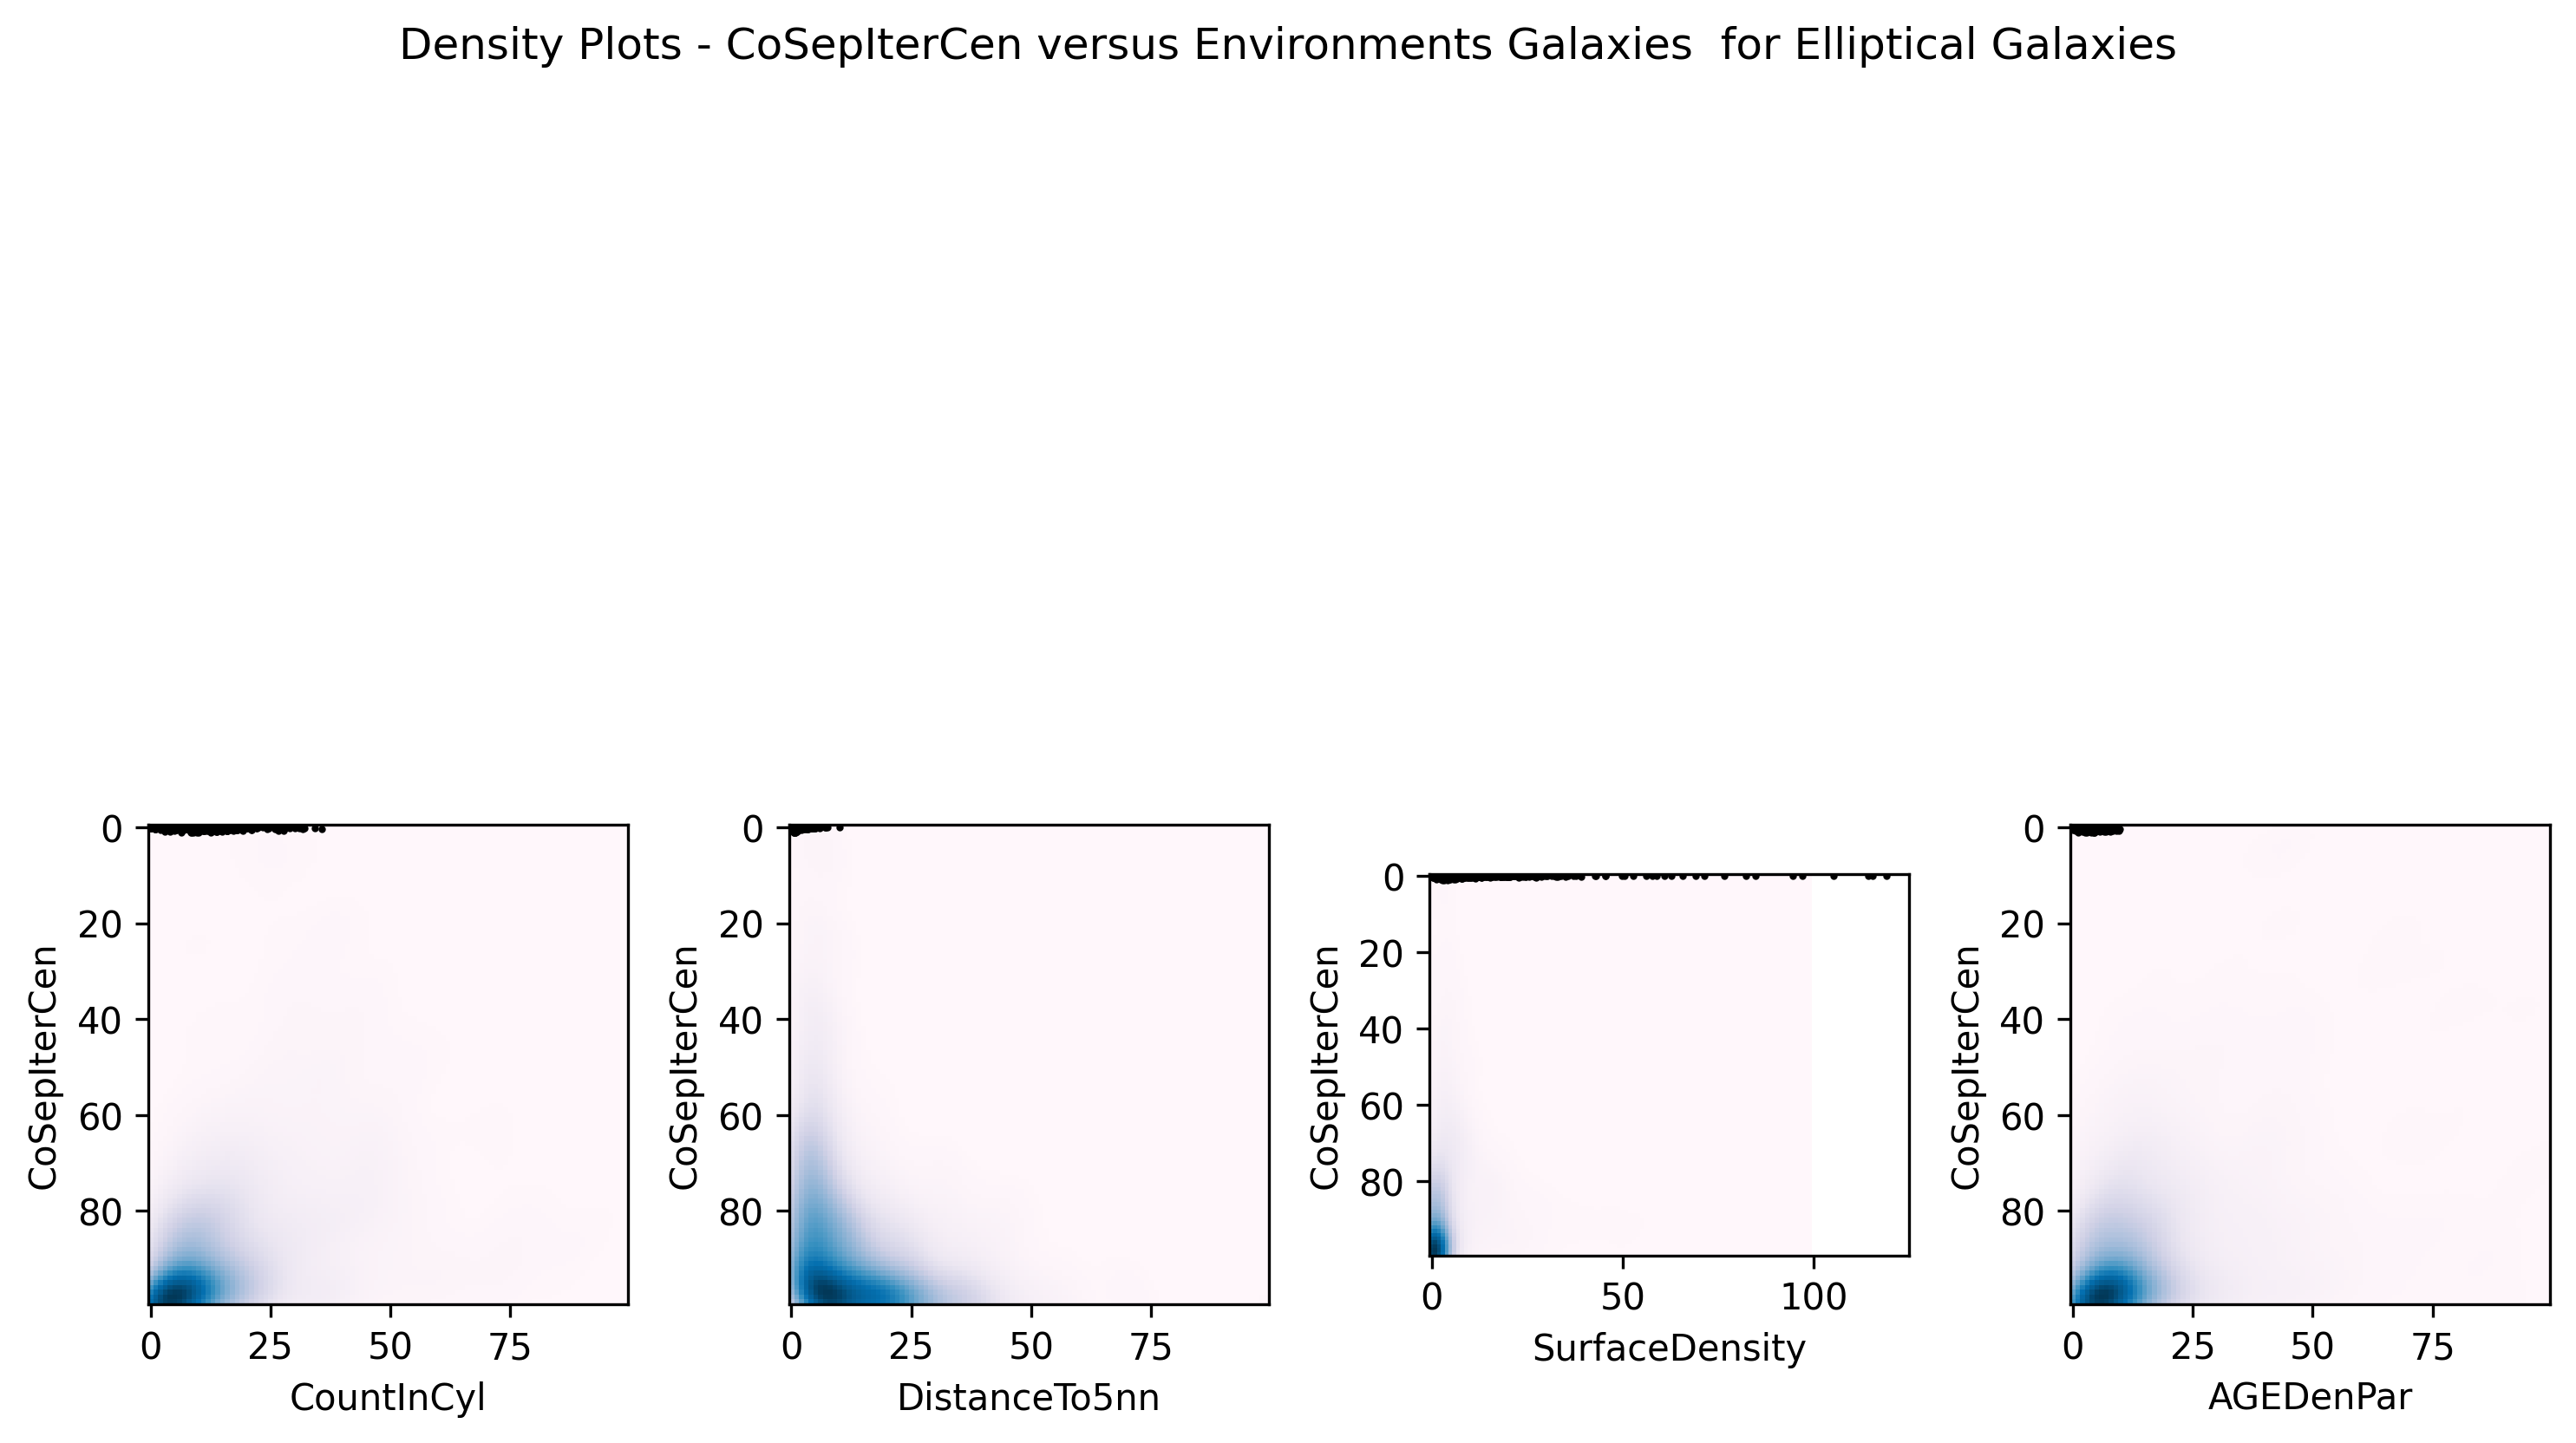

1
143


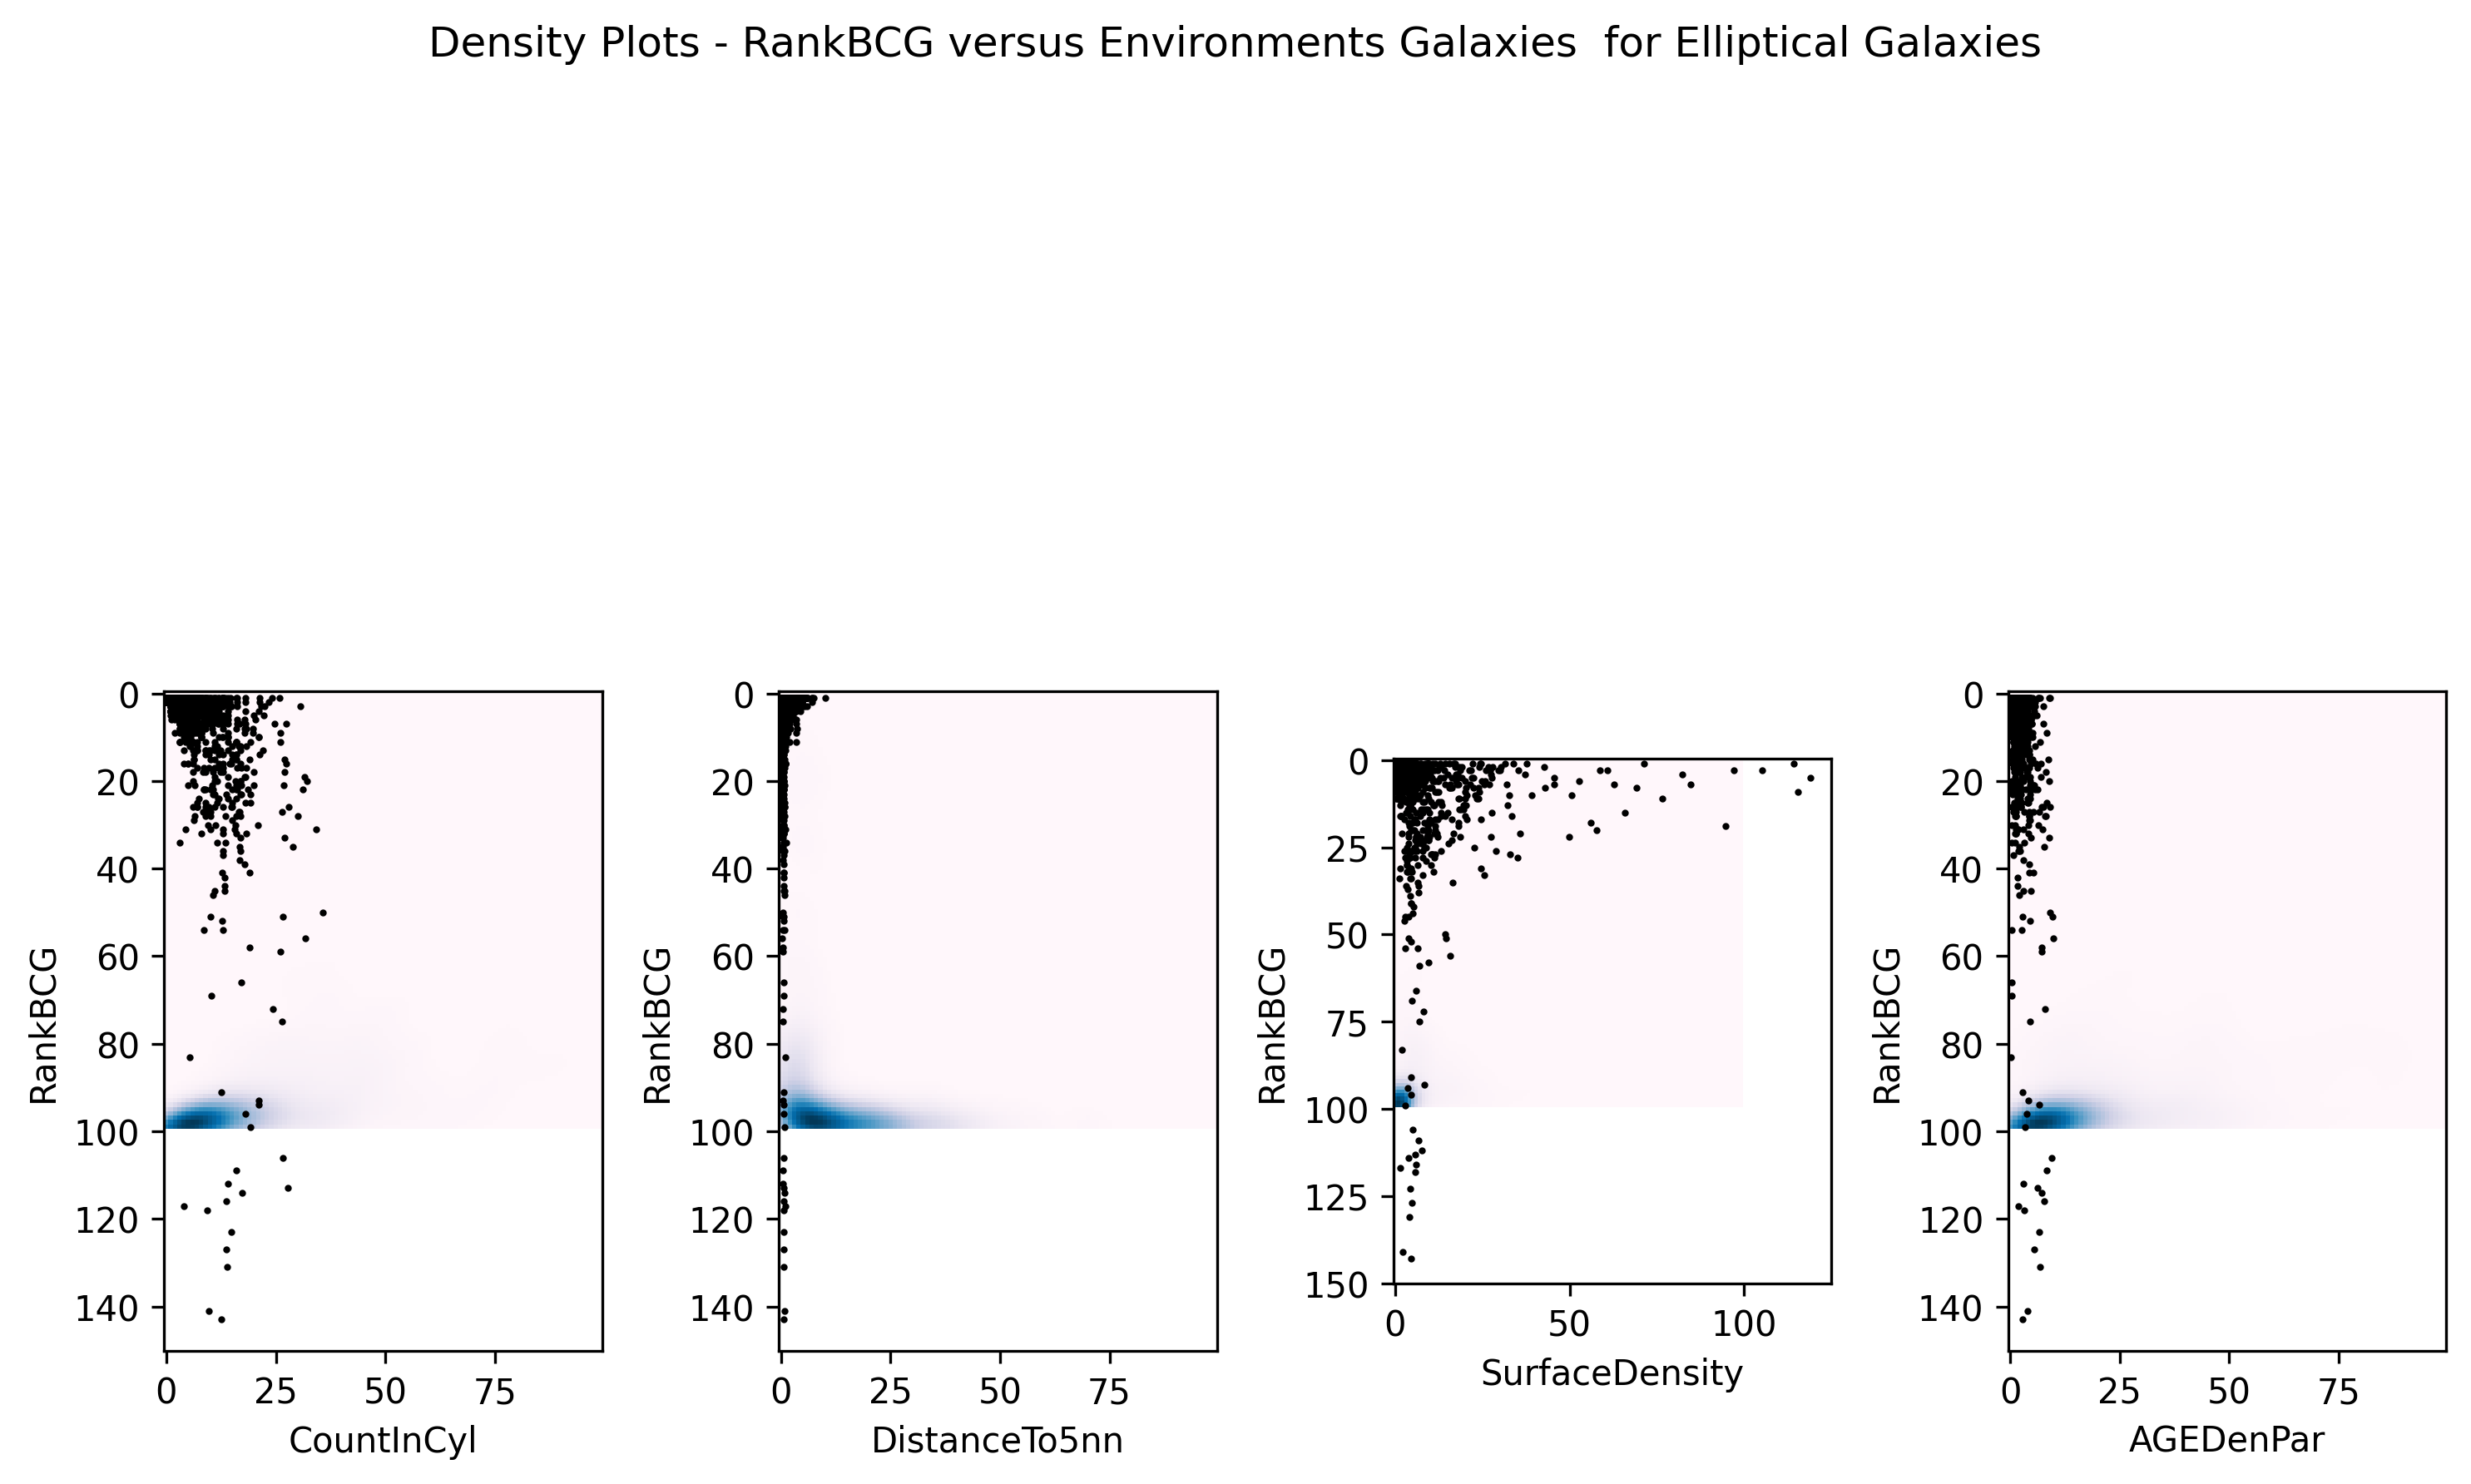

0.0
1.0987333


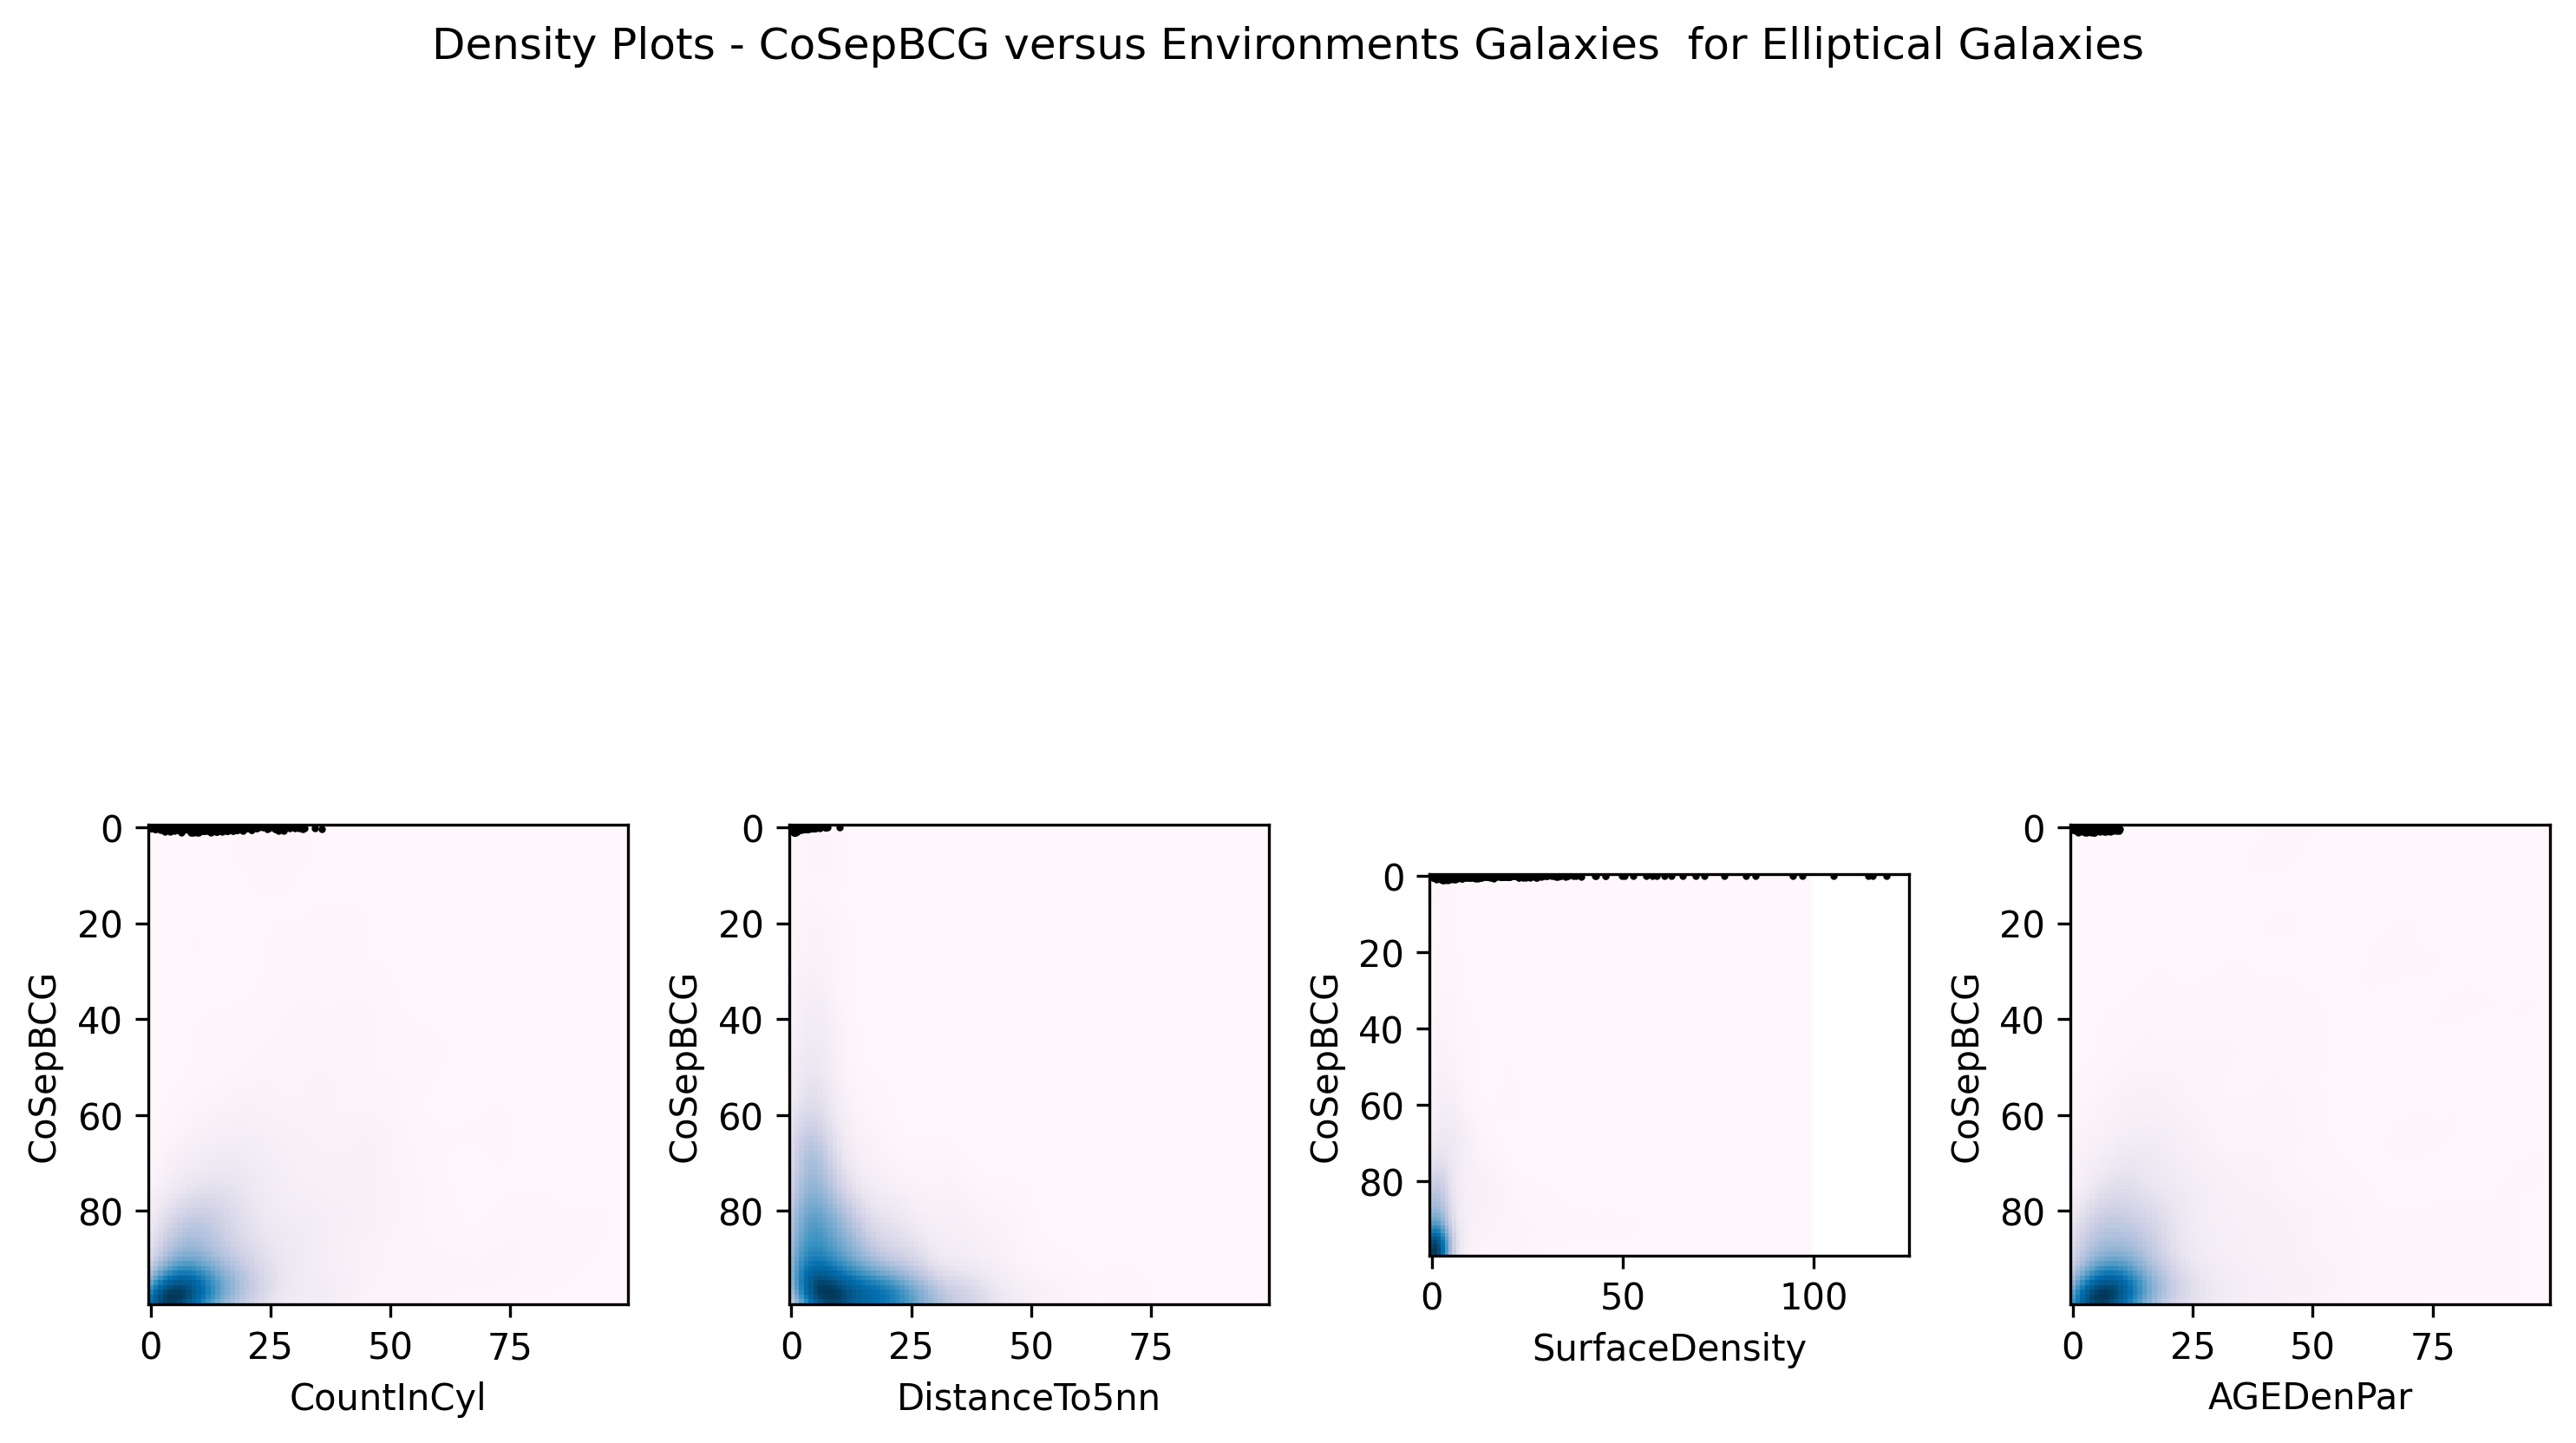

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

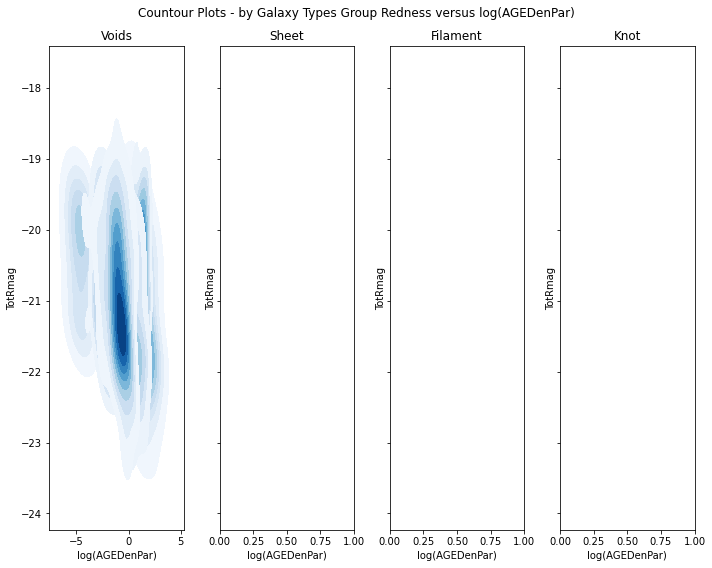

 Type Knot size 249
 Type Knot size 249
 Type Knot size 249
 Type Knot size 249


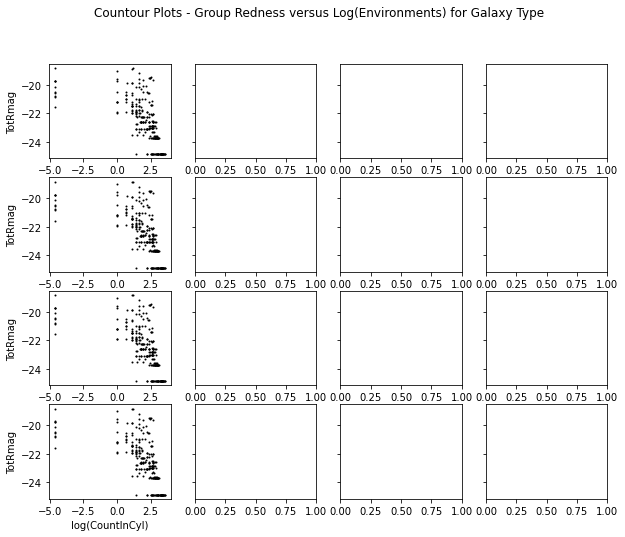

<AxesSubplot:>

In [3]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd


##ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
## Clean Data

RErange = Table.read('../../GAMA_Data/Data+LocalGroup.fits')
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
## Red Ellipitcals
RErange = RErange[RErange['ELLIPTICAL_CODE'] == 1]

alphaVal = .3
binCount = 100

yfields = ['RankIterCen','CoSepIterCen','RankBCG','CoSepBCG']
#yfields =['RankIterCen']
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1      
for yfield in yfields :
#RErange1 = REMassEClassEmeasure
    fig = plt.figure(figsize=(10, 8), dpi=300)
    fig.suptitle('Density Plots - '+yfield+' versus Environments Galaxies  for Elliptical Galaxies')
    i = 1      
    y = RErange[yfield]
    ymin = min(y)
    print(ymin)
    ymax = max(y)
    print(ymax)
    for xfield in xfields :
        x = RErange[xfield]
        xmin = min(x)
        xmax = max(x)
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions = np.vstack([X.ravel(), Y.ravel()])
        ax = fig.add_subplot(1, len(xfields), i)
        ax.set_ylabel(yfield)
        ax.set_xlabel(xfield)          
        values = np.vstack([x, y])
        kernel = stats.gaussian_kde(values)
        Z = np.reshape(kernel(positions).T, X.shape)
        #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
        #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
        #
        ax.imshow(np.rot90(Z), cmap='PuBu')
        ax.plot(x, y, 'k.', markersize=2)
        #ax.set_xlim([xmin, xmax])
        #ax.set_ylim([ymin, ymax])
        i += 1 
    #plt.show()                            
    #fig.legend(loc="upper right")
    #plt.axis([0, 3, 0, 0.8])
    fig.tight_layout()
    fig.savefig('../../ChartsPlots/GroupDenisty+'+yfield+'Environments.png', dpi=300, bbox_inches='tight')
    plt.show()
        
yfield = 'TotRmag'
types = [(0,'Voids'),(1,'Sheet'),(2,'Filament'),(3,'Knot')]
    
fig, axes = plt.subplots(1,4,figsize=(10, 8), sharey=True)            
for xfield in xfields :    
    fig.suptitle('Countour Plots - by Galaxy Types Group Redness versus log('+xfield+')')
    i = 0
    for t in types :
        subrange = RErange[RErange['GeoS4'] == t[0]]
        df = subrange.to_pandas()
        y = df[yfield]
        x = np.log(df[xfield]+0.01)
        #sns.kdeplot(x, y, ax = axes[t[0]], cmap='Blues', fill=True)
        if i == 0 :
            sns.kdeplot(x, y, ax = axes[0], cmap='Blues', fill=True)
        axes[i].set_title(t[1])
        axes[i].set_xlabel('log('+xfield+')')
        axes[i].set_ylabel(yfield)
        i+=1
fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupRedTypeLogEnvironments.png', dpi=300, bbox_inches='tight')            
plt.show()  

#fig = plt.figure(figsize=(10, 8), dpi=300)
fig, axes = plt.subplots(4,4,figsize=(10, 8), sharey=True) 
fig.suptitle('Countour Plots - Group Redness versus Log(Environments) for Galaxy Type')

xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
xfields = ['CountInCyl']
i = 0
j = 0

for gt in types :
    subrange = RErange[RErange['GeoS4'] == t[0]]
    print(f" Type {t[1]} size {len(subrange)}")
    y = subrange[yfield]
    for xfield in xfields :
        x = np.log(subrange[xfield]+0.01)
        xmin = min(x)
        xmax = max(x)
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions = np.vstack([X.ravel(), Y.ravel()])
        #ax = fig.add_subplot(1, len(xfields), i)
        axes[i,j].set_ylabel(yfield)
        axes[i,j].set_xlabel('log('+xfield+')')            
        values = np.vstack([x, y])
        kernel = stats.gaussian_kde(values)
        Z = np.reshape(kernel(positions).T, X.shape)
        #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
        #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
        
        #axes[i,j].imshow(np.rot90(Z), cmap='PuBu')
        axes[i,j].plot(x, y, 'k.', markersize=2)
        #ax.set_xlim([xmin, xmax])
        #ax.set_ylim([ymin, ymax])                           
        #fig.legend(loc="upper right")
        #plt.axis([0, 3, 0, 0.8])
        j+=1
    j = 0    
    i+=1   
#fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupDenistyTotRmagLogEnvironmentsGalaxyType.png', dpi=300, bbox_inches='tight')
plt.show()
    
#fig, axes = plt.subplots(1,4,figsize=(10, 8), sharey=True)            
#for xfield in xfields :  
#    fig.suptitle('Countour Plots - by Galaxy Types log(uminusr/Group Redness) versus log('+xfield+')')
#    i = 0
#    for t in types :
#        subrange = RErange[RErange['GeoS4'] == t[0]]
#        df = subrange.to_pandas()
#        y = np.log(df['uminusr']/df[yfield])
#        x = np.log(df[xfield]+0.01)
#        sns.kdeplot(x, y, ax = axes[t[0]], cmap='Blues', fill=True)
#        axes[i].set_title(t[1])
#        axes[i].set_xlabel('log('+xfield+')')
#        axes[i].set_ylabel('log(uminusr/'+yfield+')')
#        i+=1
#fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupRedRatioTypeLogEnvironments.png', dpi=300, bbox_inches='tight')              
#plt.show()           
fig.add_subplot(4, 1, 4)